In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from nonLinCorr import *

In [2]:
def flatten_and_mask_shots(shots, mask,):
    num_shots = shots.shape[0]
    size = shots.shape[1]*shots.shape[2]
    flat_mask = mask.reshape(size)
    flat_shots =  shots.reshape( (num_shots,size))*flat_mask
    
    return flat_shots[:,flat_mask]

def unflatten_shots(flat_shots,mask):
    num_shots = flat_shots.shape[0]
    shape = mask.shape
    flat_mask = mask.reshape(shape[0]*shape[1]
                            )
    shots = np.zeros( (num_shots,shape[0]*shape[1]), dtype = flat_shots.dtype)
    shots[:, flat_mask ] = flat_shots
    
    return shots.reshape( (num_shots,shape[0],shape[1]))

In [3]:
run = 71
f = h5py.File('/reg/d/psdm/cxi/cxilr6716/results/\
flatfield_calibration/ave_int_statisitcs/run%d_ave_int.h5'%run,'r')
# f.keys()

f_mask = h5py.File('/reg/d/psdm/cxi/cxilr6716/results/masks/run%d_masks.h5'%run,'r')
mask=f_mask['mask'].value

flat_ave_shots = f['ave_flat_shots'].value
num_shots = f['num_shots_per_bin'].value

# thresholding
select=num_shots>10
flat_ave_shots = flat_ave_shots[select]
flat_std_shots = f['ave_flat_shots_err'].value[select]

ave_bin_int = flat_ave_shots.mean(-1)
print flat_ave_shots.shape,ave_bin_int.shape

(22, 2223908) (22,)


In [4]:
ref_ind = 10
corrFunc,cn = getCorrectionFunc(dmat=flat_ave_shots.copy(),i = ave_bin_int.copy(),
                             ic = ave_bin_int[ref_ind], order=10)
sn_corrected = corrFunc(flat_ave_shots,ave_bin_int)
sn_corrected.shape

cali_curves = cn(ave_bin_int)

In [6]:
ref_shot = flat_ave_shots[ref_ind].copy()
ref_shot= ref_shot/ref_shot.mean()

test_ind = 15
test_shot = flat_ave_shots[test_ind].copy()
test_shot/=test_shot.mean()

diff = test_shot/(ref_shot) -1. 
cali_diff = cali_curves[test_ind].copy()
cali_diff/=cali_diff.mean()
cali_diff = cali_diff/(ref_shot)-1.

flat_ave_shots[test_ind].mean()

14.742378931133725

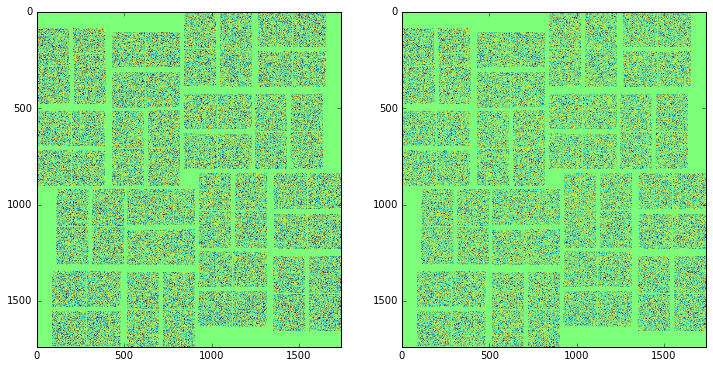

In [9]:
# img = unflatten_shots(flat_ave_shots[1:2,:],mask)[0]
plt.figure(figsize=[12,6])
img = unflatten_shots(diff[None,:],mask)[0]
plt.subplot(121)
plt.imshow( img, aspect='auto',
         vmin=-0.2,vmax = .2)

img = unflatten_shots(cali_diff[None,:],mask)[0]

plt.subplot(122)
plt.imshow( img, aspect='auto',
         vmin=-.2,vmax = .2)

# plt.colorbar()

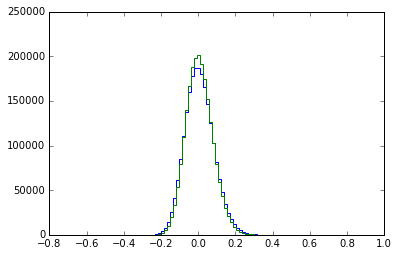

In [10]:
bins= np.linspace(-0.8,.8,100)
hist=np.histogram(diff, bins=bins)
plt.step(hist[1][1:],hist[0])
hist=np.histogram(cali_diff, bins=bins)
plt.step(hist[1][1:],hist[0])

In [11]:

cali_diff2 = sn_corrected[test_ind].copy()
cali_diff2/=cali_diff2.mean()
sc=cn(ave_bin_int[ref_ind])[0]
sc/=sc.mean()
cali_diff2 = cali_diff2/(sc) -1

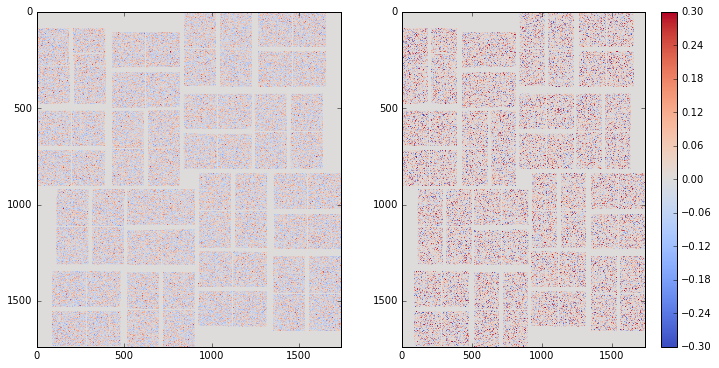

In [12]:
plt.figure(figsize=[12,6])
img = unflatten_shots(diff[None,:],mask)[0]
plt.subplot(121)
plt.imshow( img, aspect='auto',
         vmin=-.3,vmax = .3, cmap='coolwarm')

img = unflatten_shots(cali_diff2[None,:],mask)[0]

plt.subplot(122)
plt.imshow( img, aspect='auto',
         vmin=-.3,vmax = .3, cmap='coolwarm')
plt.colorbar()

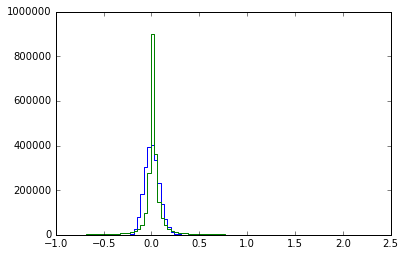

In [13]:
bins= np.linspace(-1,2.5,100)
hist=np.histogram(diff, bins=bins)
plt.step(hist[1][1:],hist[0])
hist=np.histogram(cali_diff2, bins=bins)
plt.step(hist[1][1:],hist[0])

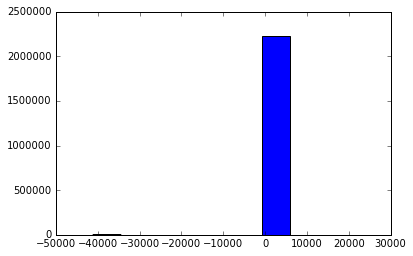

In [14]:
# _=plt.hist(ref_shot,100)
# _=plt.hist(sc,100, alpha=0.5)
_=plt.hist(sn_corrected[test_ind]/(sn_corrected[test_ind].mean()))
# _=plt.hist(flat_ave_shots[ref_ind],100)
# _=plt.hist(test_shot,100, alpha=0.5)

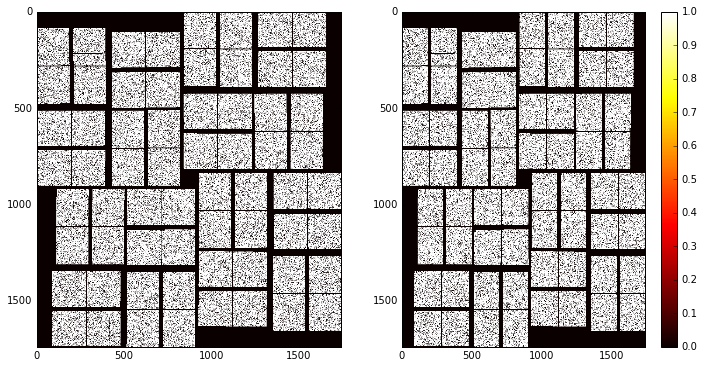

In [15]:
plt.figure(figsize=[12,6])
img = unflatten_shots(np.abs(diff[None,:])<0.1,mask)[0]
plt.subplot(121)
plt.imshow( img, aspect='auto',
         vmin=0,vmax = 1, cmap='hot')

img = unflatten_shots(np.abs(cali_diff2[None,:])<0.1,mask)[0]

plt.subplot(122)
plt.imshow( img, aspect='auto',
         vmin=0,vmax = 1, cmap='hot')
plt.colorbar()

12.2710749364
14.7423789311


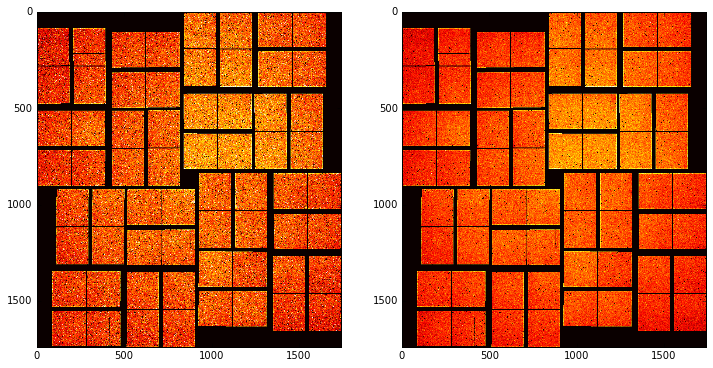

In [19]:
plt.figure(figsize=[12,6])

img = unflatten_shots(sn_corrected[test_ind][None,:],mask)[0]
plt.subplot(121)
plt.imshow( img, aspect='auto',
         vmin=10,vmax = 20,cmap='hot')

img = unflatten_shots(flat_ave_shots[test_ind][None,:],mask)[0]

plt.subplot(122)
plt.imshow( img, aspect='auto',
         vmin=10,vmax = 20,cmap='hot')

print ave_bin_int[ref_ind]
print ave_bin_int[test_ind]

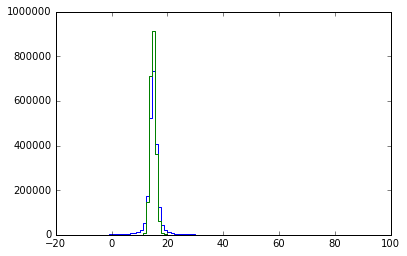

In [17]:

bins= np.linspace(-10,100,100)
hist=np.histogram(sn_corrected[test_ind], bins=bins)
plt.step(hist[1][1:],hist[0])
hist=np.histogram(flat_ave_shots[test_ind], bins=bins)
plt.step(hist[1][1:],hist[0])

In [158]:
flat_ave_shots[test_ind].mean()

31.506521752856841